In [81]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 
import random 
import scipy 
import seaborn as sns 
import requests 
import json
import os 
import datetime as dt

In [2]:
crime=pd.read_csv('data\crime-labor-cleaned.csv')

In [3]:
crime.sample(n=15)

,date,sexual,violent,property,Labor Force,Employed,Unemployed,Unemployment Rate
43,2009-08-01,38,633,1490,124000,111600,12400,10.0
192,1994-12-01,280,6890,24093,143800,131800,12000,8.4
112,2015-05-01,41,513,979,111800,103900,8000,7.1
14,2007-03-01,35,537,1128,119500,113100,6500,5.4
150,2018-07-01,27,483,1064,111000,104200,6800,6.1
128,2016-09-01,21,392,1013,109700,102500,7200,6.6
139,2017-08-01,27,495,1088,111500,103300,8200,7.3
165,2019-10-01,21,352,914,108900,103300,5600,5.2
57,2010-10-01,28,505,1381,118200,105900,12400,10.4
83,2012-12-01,14,435,1169,115400,104100,11300,9.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                   --------------  -----  
 0   date                                                                                                                                                                                     197 non-null    object 
 1   sexual                                                                                                                                                                                   197 non-null    int64  
 2   violent                            

In [5]:
crime.sexual=crime.sexual.astype(int)

In [6]:
crime.columns

Index(['date', 'sexual', 'violent', 'property', 'Labor Force', 'Employed',
       'Unemployed',
       'Unemployment Rate                                                                                                                                                                      '],
      dtype='object')

In [7]:
crime=crime.rename(columns={'Unemployment Rate                                                                                                                                                                      ':'UR'})
crime.head()

,date,sexual,violent,property,Labor Force,Employed,Unemployed,UR
0,2006-01-01,45,466,972,121900,113900,8000,6.5
1,2006-02-01,18,301,532,122100,113800,8300,6.8
2,2006-03-01,6,114,215,121900,114100,7800,6.4
3,2006-04-01,18,347,688,122300,114600,7700,6.3
4,2006-05-01,43,712,1315,122900,115200,7600,6.2


In [8]:
crime=crime.reset_index()


In [8]:
crime.date=pd.to_datetime(crime.date)

In [9]:
crime=crime.set_index('date')

In [10]:
crime.property=crime.property.astype(int)
crime.violent=crime.violent.astype(int)
crime['ctotal']=crime['sexual']+crime['property']+crime['violent']

In [11]:
crime.head()

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal
date,,,,,,,,
2006-01-01,45,466,972,121900,113900,8000,6.5,1483
2006-02-01,18,301,532,122100,113800,8300,6.8,851
2006-03-01,6,114,215,121900,114100,7800,6.4,335
2006-04-01,18,347,688,122300,114600,7700,6.3,1053
2006-05-01,43,712,1315,122900,115200,7600,6.2,2070


<AxesSubplot:xlabel='date'>

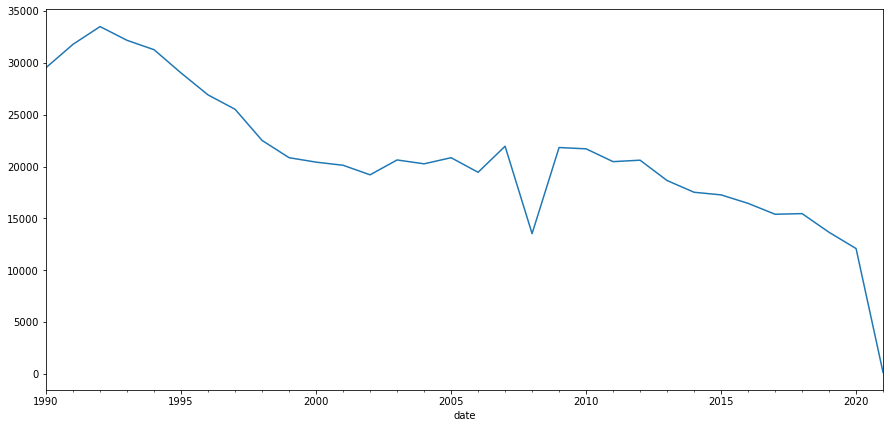

In [12]:
crime.ctotal.resample('A').sum().plot(figsize=(15,7))

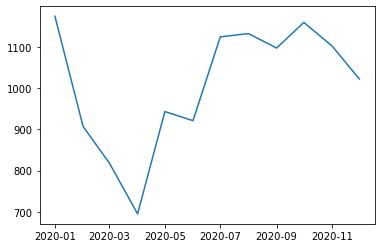

In [13]:
check=crime.loc['2020']
plt.plot(check.ctotal)


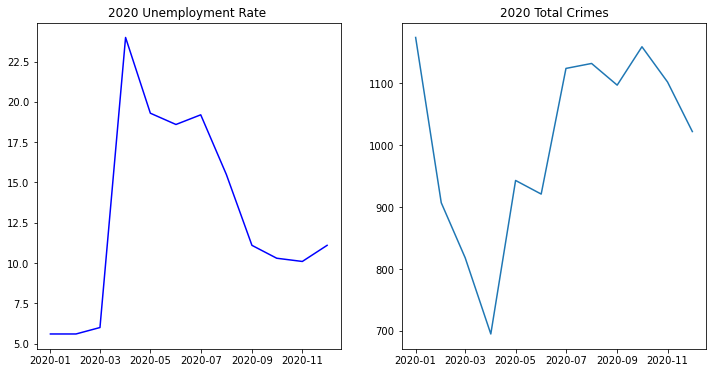

In [14]:
fig = plt.figure(figsize=(12, 6))
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax.plot(check.UR,color='blue',label='')
ax.set_title('2020 Unemployment Rate ')

ax2.plot(check.ctotal)
ax2.set_title('2020 Total Crimes')
plt.show()

In [15]:
crime.ctotal[:'2005'].describe()

count       16.00000
mean     25284.93750
std       5218.61212
min      19202.00000
25%      20582.25000
50%      24019.50000
75%      29968.50000
max      33493.00000
Name: ctotal, dtype: float64

In [16]:
crime.ctotal['2005':].describe()

count      182.000000
mean      1577.307692
std       1503.285225
min         17.000000
25%       1197.500000
50%       1508.000000
75%       1772.000000
max      20852.000000
Name: ctotal, dtype: float64

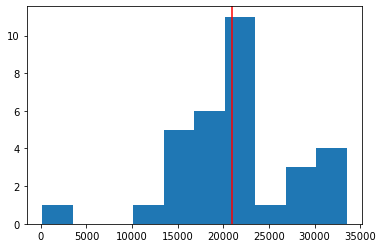

In [17]:
c=crime.ctotal['2006':].resample('A').sum()
_=plt.hist(c)
_=plt.axvline(c.mean(),color='red')
plt.show()

In [18]:
df=crime

In [19]:
df['lockdown']=0

In [20]:
for i in df.lockdown :
    if i in df.lockdown['2020':]==0:
        df.lockdown[i].str.replace('0','1')
        

In [21]:
df.lockdown['2020':'2021']=1

<ipython-input-21-6555e39bd974>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lockdown['2020':'2021']=1
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
df.lockdown[:'2019']=0

<ipython-input-22-5cb5595920c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lockdown[:'2019']=0


In [23]:
df.lockdown['2020-01':'2020-02']=0

<ipython-input-23-4a40f27219a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lockdown['2020-01':'2020-02']=0


In [24]:
df.lockdown['2020']

date
2020-01-01    0
2020-02-01    0
2020-03-01    1
2020-04-01    1
2020-05-01    1
2020-06-01    1
2020-07-01    1
2020-08-01    1
2020-09-01    1
2020-10-01    1
2020-11-01    1
2020-12-01    1
Name: lockdown, dtype: int64

In [25]:
df['e_stimulus']=0

In [26]:
df.e_stimulus['2008-03']=1
df.e_stimulus['2020-04']=1
df.e_stimulus['2020-11']=1

<ipython-input-26-18d5ca3a20e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.e_stimulus['2008-03']=1
<ipython-input-26-18d5ca3a20e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.e_stimulus['2020-04']=1
<ipython-input-26-18d5ca3a20e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.e_stimulus['2020-11']=1


calculating the crime rate per 100000 using the university of Arkensas method, ((crime count)/(total population))∗100,000,then converting it to percentage points  assuming that the real population is double the size of the work force


In [27]:
pop=pd.read_html('https://www.biggestuscities.com/city/buffalo-new-york')
pop1=pop[0]

In [28]:
pop1=pop1[:19]
pop1.Population=pop1['Population'].astype(int)

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
pop1

,Year,Population,Rank in US
0,2019,255284,86
1,2018,256304,83
2,2017,258612,81
3,2016,256902,81
4,2015,258071,78
5,2014,258703,76
6,2013,258959,73
7,2012,259384,73
8,2011,260371,72
9,2010,261310,70


In [30]:
crime['crime_rate']=(crime['ctotal']/crime['Labor Force']*100000)/100/2

In [31]:

df['crime_rate']=(df['ctotal']/df['Labor Force']*100000)/100/2
df.head()

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,
2006-01-01,45,466,972,121900,113900,8000,6.5,1483,0,0,6.082855
2006-02-01,18,301,532,122100,113800,8300,6.8,851,0,0,3.484848
2006-03-01,6,114,215,121900,114100,7800,6.4,335,0,0,1.374077
2006-04-01,18,347,688,122300,114600,7700,6.3,1053,0,0,4.304988
2006-05-01,43,712,1315,122900,115200,7600,6.2,2070,0,0,8.421481


In [147]:
df=df['2006':]
df.sample(n=15)

,index,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,,
2017-10-01,141,33,408,997,109200,102500,6700,6.1,1438,0,0,6.584249
2006-07-01,6,48,672,1531,124700,116300,8300,6.7,2251,0,0,9.025662
2010-09-01,56,36,471,1478,118800,105900,12800,10.8,1985,0,0,8.354377
2012-01-01,72,32,436,1195,115600,102500,13100,11.3,1663,0,0,7.192907
2015-05-01,112,41,513,979,111800,103900,8000,7.1,1533,0,0,6.855993
2020-06-01,173,4,346,571,114400,93100,21300,18.6,921,1,0,4.025350
2013-02-01,85,28,359,860,114600,102700,11900,10.3,1247,0,0,5.440663
2011-05-01,64,31,481,1297,115600,103800,11800,10.2,1809,0,0,7.824394
1994-12-01,192,280,6890,24093,143800,131800,12000,8.4,31263,0,0,108.703060


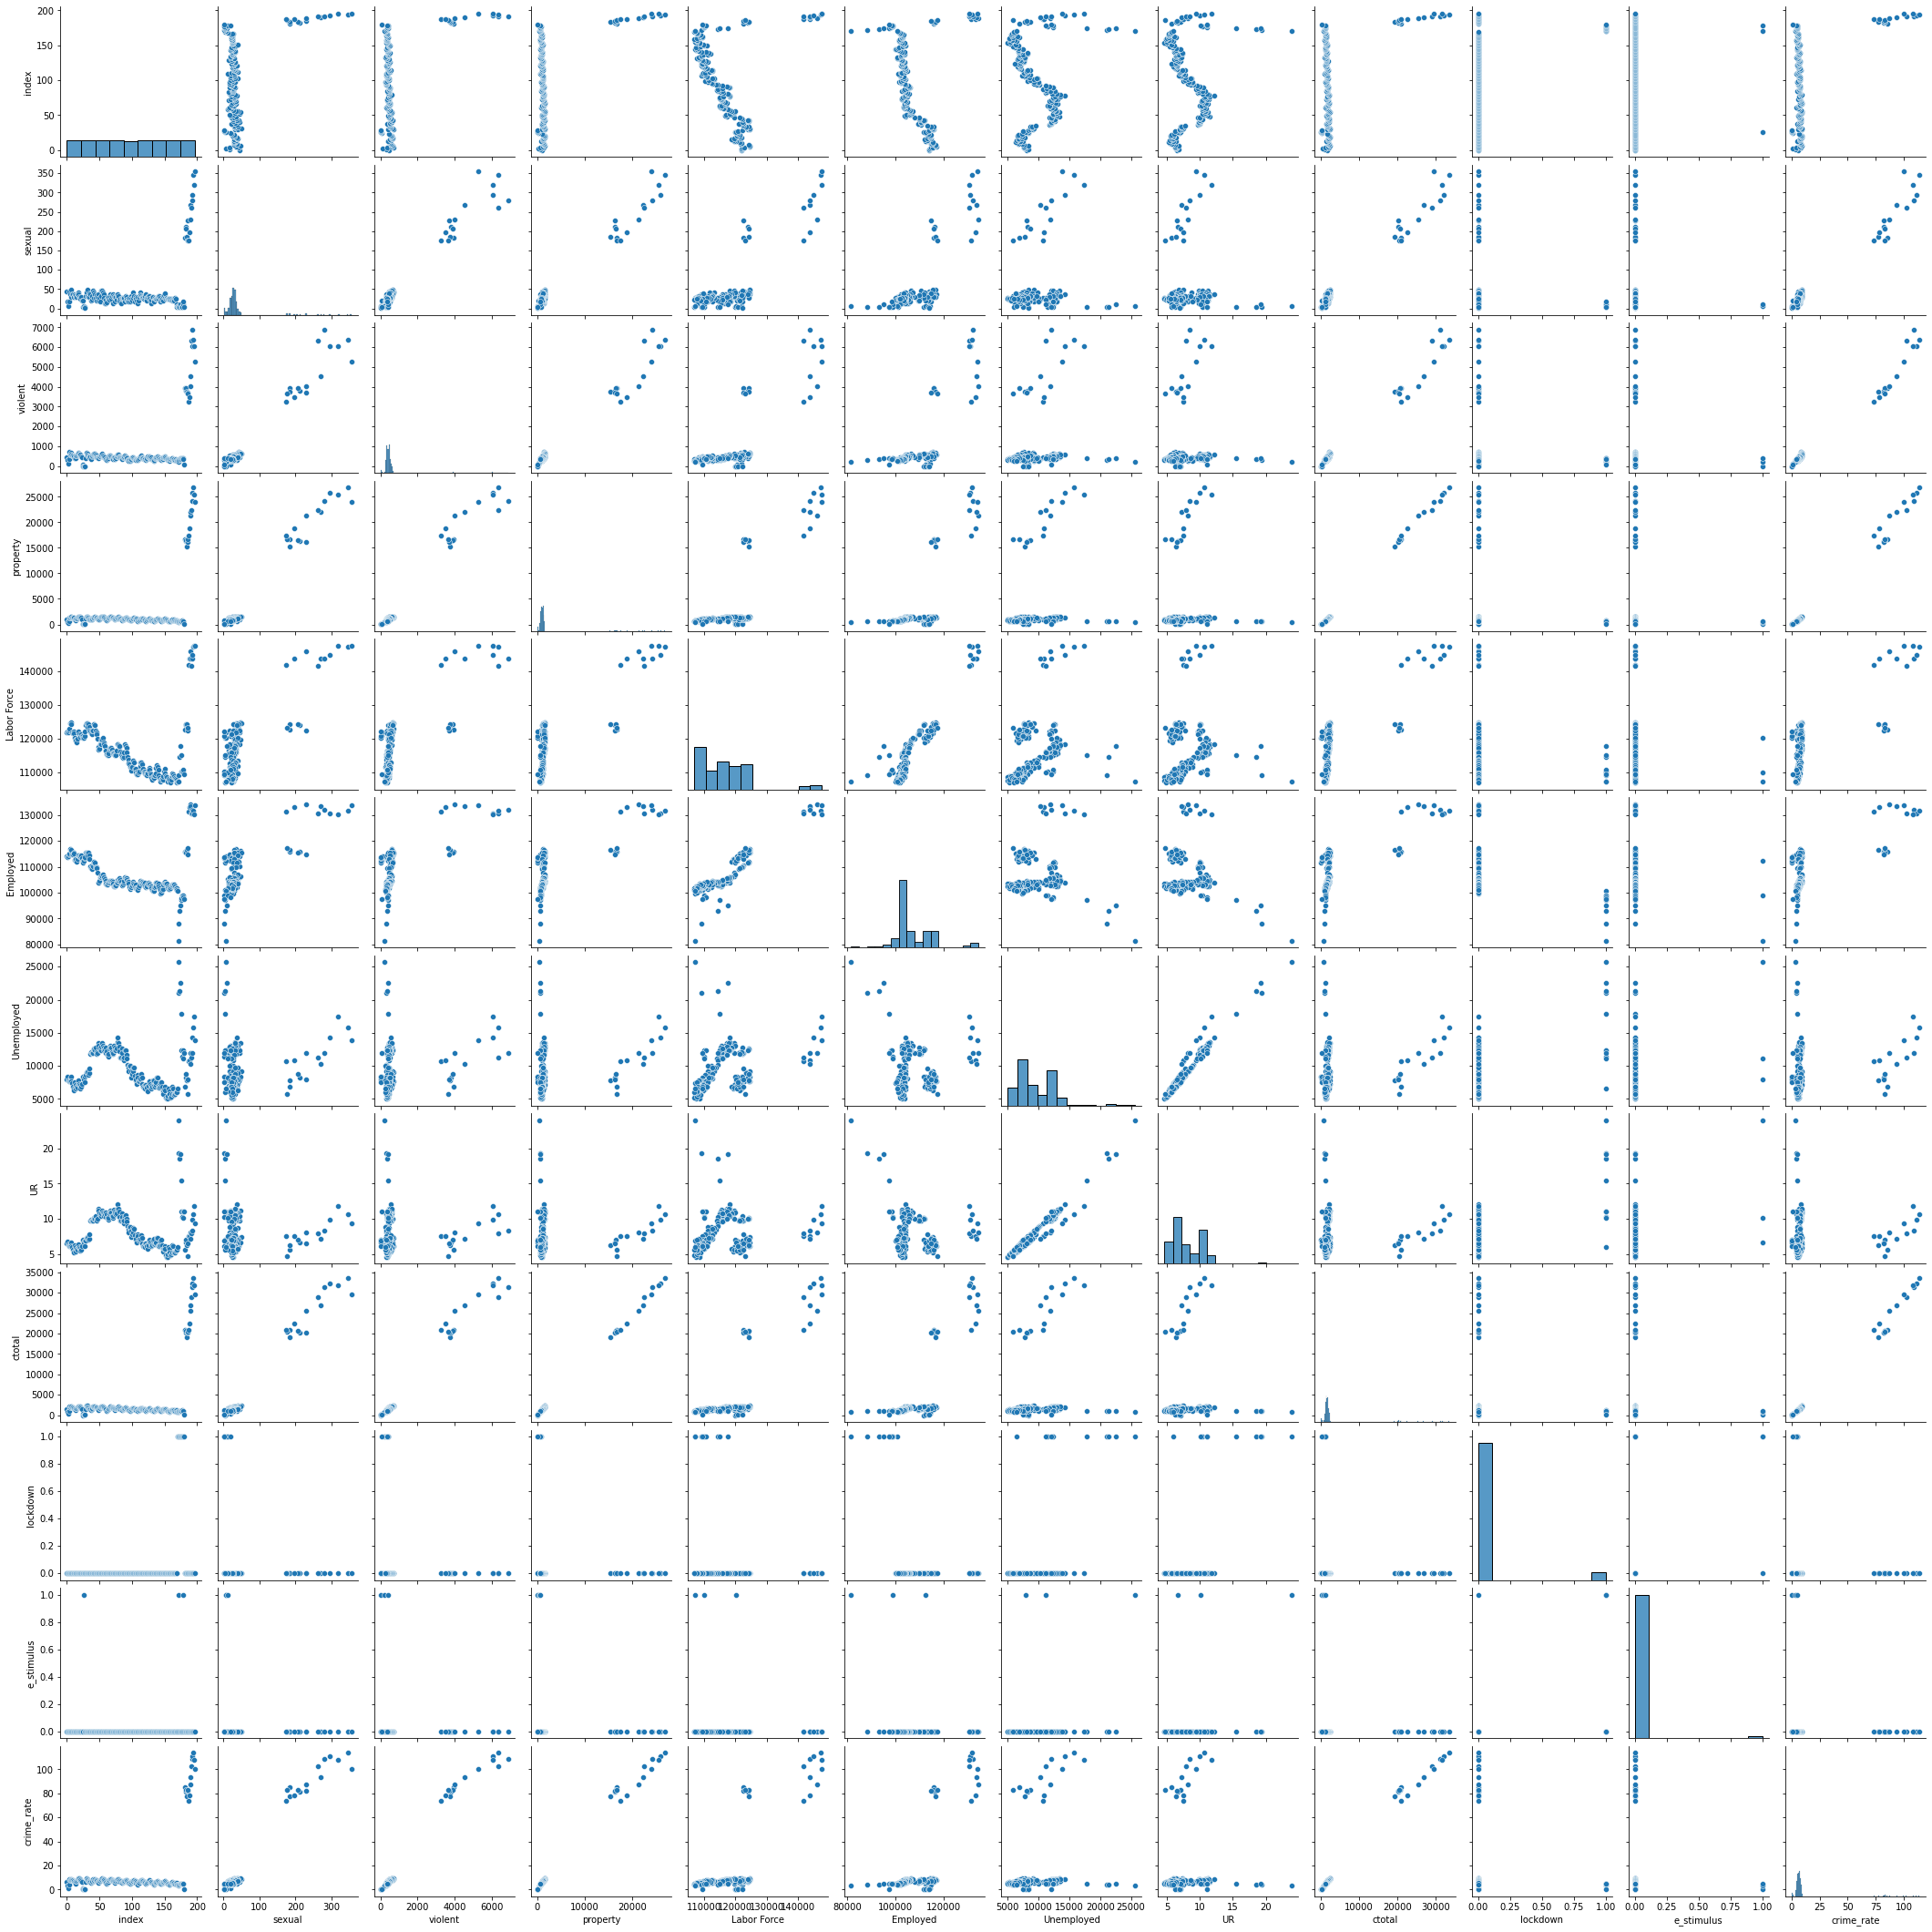

In [35]:
sns.pairplot(df)
plt.show()

In [72]:
before_covid=df.loc['2006':'2019']
cor=before_covid.corr()
cor

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
sexual,1.000000,0.283319,0.025286,0.247711,0.235259,0.085461,0.048283,0.106701,NaN,-0.187236,0.079334
violent,0.283319,1.000000,0.848964,0.653077,0.623352,0.222799,0.133789,0.913191,NaN,0.218498,0.888838
property,0.025286,0.848964,1.000000,0.574883,0.489557,0.306568,0.239970,0.990462,NaN,0.311553,0.988174
Labor Force,0.247711,0.653077,0.574883,1.000000,0.882213,0.474954,0.352887,0.613578,NaN,0.071597,0.511351
Employed,0.235259,0.623352,0.489557,0.882213,1.000000,0.004762,-0.128870,0.539204,NaN,0.100537,0.444054
Unemployed,0.085461,0.222799,0.306568,0.474954,0.004762,1.000000,0.990358,0.296013,NaN,-0.035967,0.256812
UR,0.048283,0.133789,0.239970,0.352887,-0.128870,0.990358,1.000000,0.221548,NaN,-0.047313,0.195708
ctotal,0.106701,0.913191,0.990462,0.613578,0.539204,0.296013,0.221548,1.000000,NaN,0.293878,0.991814
lockdown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_stimulus,-0.187236,0.218498,0.311553,0.071597,0.100537,-0.035967,-0.047313,0.293878,NaN,1.000000,0.306691


<AxesSubplot:>

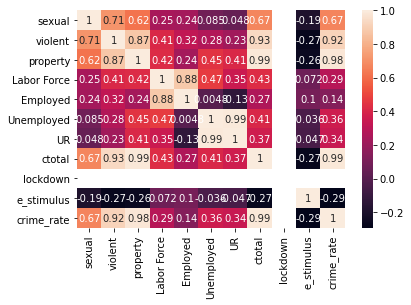

In [33]:
sns.heatmap(cor,annot=True)

the crime is highly coorelated with the labor force and employed as well as lockdown and yetthis mattern needs more investigation .


<AxesSubplot:>

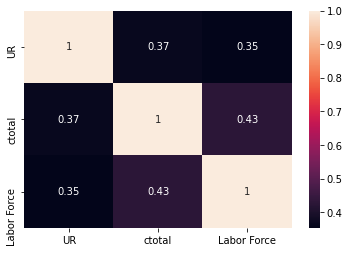

In [34]:
crime1=before_covid[['UR','ctotal','Labor Force']]
cor=crime1.corr()
sns.heatmap(cor,annot=True)

<ipython-input-73-cc988af7881d>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)
<ipython-input-73-cc988af7881d>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
<ipython-input-73-cc988af7881d>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be cre

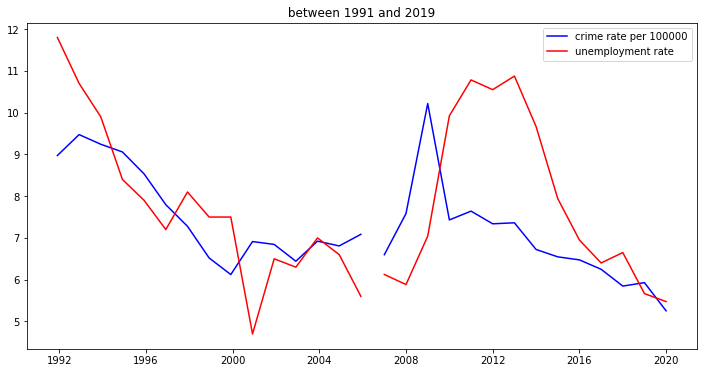

In [73]:
cr5=crime.crime_rate['1991':'2005']/12
ur5=crime.UR['1991':'2005']

fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax22=fig.add_subplot(111)

ax1.plot(cr5,color='blue',label='crime rate per 100000')
ax1.set_title('Unemployment and Crime rates  ')
ax22.plot(ur5,color='red',label='unemployment rate ')
plt.legend()

cr=before_covid.crime_rate.resample('A').mean()
ur=before_covid.UR.resample('A').mean()

ax=fig.add_subplot(111)
ax2=fig.add_subplot(111)

ax.plot(cr,color='blue',label='crime rate per 100k')
ax.set_title(' between 1991 and 2019 ')
ax2.plot(ur,color='red',label='unemployment rate')


plt.show()


It seems that there are either misreporting or under reporting during 2008

In [41]:
before_covid['2006':'2008']

,index,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,,
2006-01-01,0,45,466,972,121900,113900,8000,6.5,1483,0,0,6.082855
2006-02-01,1,18,301,532,122100,113800,8300,6.8,851,0,0,3.484848
2006-03-01,2,6,114,215,121900,114100,7800,6.4,335,0,0,1.374077
2006-04-01,3,18,347,688,122300,114600,7700,6.3,1053,0,0,4.304988
2006-05-01,4,43,712,1315,122900,115200,7600,6.2,2070,0,0,8.421481
2006-06-01,5,36,595,1265,124500,116900,7700,6.2,1896,0,0,7.614458
2006-07-01,6,48,672,1531,124700,116300,8300,6.7,2251,0,0,9.025662
2006-08-01,7,30,596,1432,124300,116600,7700,6.2,2058,0,0,8.278359
2006-09-01,8,38,554,1326,121900,114600,7400,6.0,1918,0,0,7.867104


the first half of 2008 looks veryodd , which indicates either under reporting , missing reports or its the reality yet , looking at the months preceding and following it, it's really hard to conclude that the data merely represent reality , especially considering the fact that neither a lock down, nor unemployment beneits expansion was in place. 


<AxesSubplot:xlabel='crime_rate', ylabel='UR'>

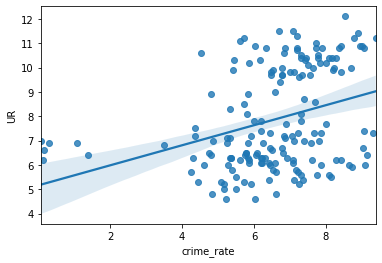

In [37]:
sns.regplot(x='crime_rate',y='UR',data=before_covid)

# anomaly

<ipython-input-38-778d0a99f071>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


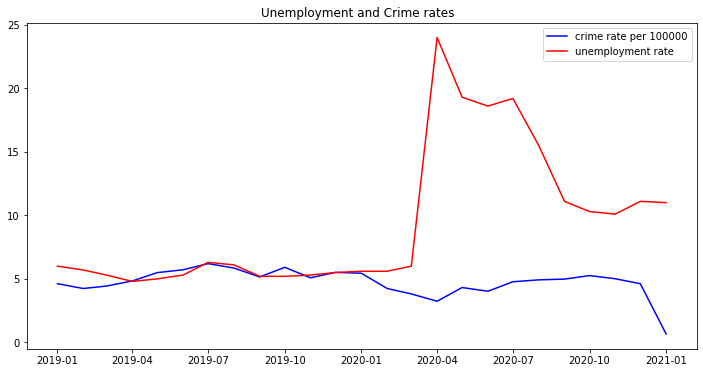

In [38]:


cra=crime.crime_rate['2019':'2021']
ura=crime.UR['2019':'2021']

fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax22=fig.add_subplot(111)

ax1.plot(cra,color='blue',label='crime rate per 100000')
ax1.set_title('Unemployment and Crime rates  ')
ax22.plot(ura,color='red',label='unemployment rate ')
plt.legend()

the unemployment rate for the large part was very coorelated with the crime rate until 03-2020 . external variables such as Lock downs around the state , and unemployment benifit expansion , as well as the economic stimulus payments should be taken into account as factors in the decline of the crime rate while the unemployment rate spiking. 


#  population 

<AxesSubplot:xlabel='Year'>

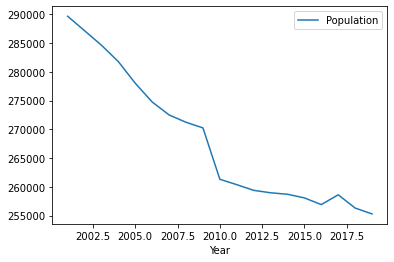

In [49]:

pop1=pop1.set_index('Year')
pop1.plot()

<AxesSubplot:xlabel='date'>

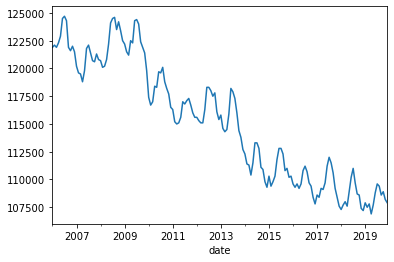

In [496]:
before_covid['Labor Force'].plot()

In [51]:
pop2=pop1[0:13]

<ipython-input-53-2b62a0ec040a>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


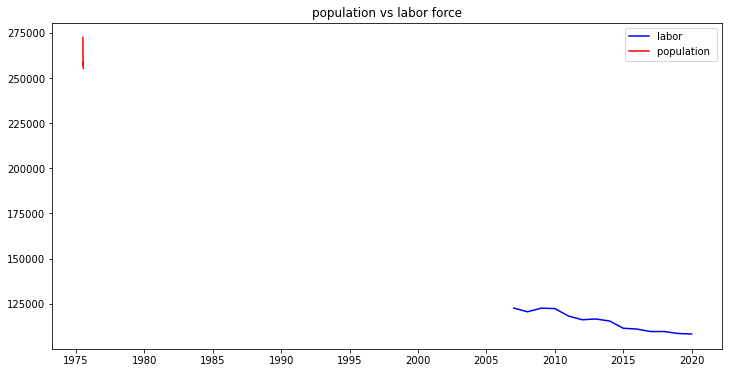

In [53]:
labor=before_covid['Labor Force'].resample('A').mean()


fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax22=fig.add_subplot(111)

ax1.plot(labor,color='blue',label='labor')
ax1.set_title('population vs labor force')
ax22.plot(pop2['Population'],color='red',label='population ')
plt.legend()

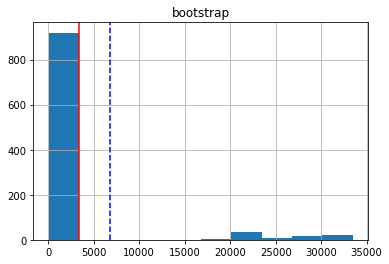

In [56]:
bootstrap=pd.DataFrame({'bootstrap':df.ctotal.sample(1000,replace=True)for i in range(10000)})
bootstrap.hist()
plt.axvline((bootstrap.bootstrap.mean()),color='red')
plt.axvline((bootstrap.bootstrap.std()),color='blue',linestyle="--")



In [59]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success

def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y


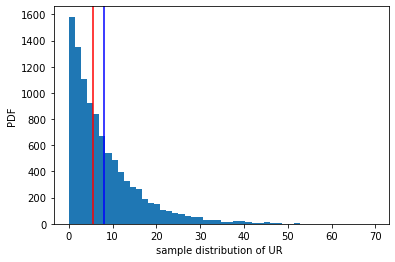

In [57]:
sample=np.random.exponential(df.UR.mean(),10000)
_ = plt.hist(sample,
               bins=50)
_ = plt.xlabel('sample distribution of UR ')
_ = plt.ylabel('PDF')
_=plt.axvline(np.median(sample),linestyle='-',color='red')
_=plt.axvline(np.mean(sample),linestyle='-',color='blue')

plt.show()

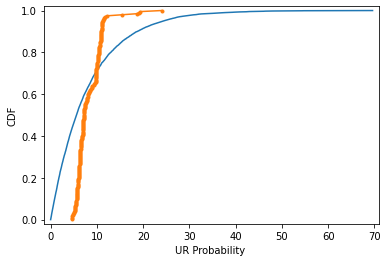

In [60]:
x,y=ecdf(df.UR)
sample=np.random.exponential(df.UR.mean(),10000)
x_theor,y_theor=ecdf(sample)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle=None)

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('UR Probability ')
plt.ylabel('CDF')

# Show the plot
plt.show()

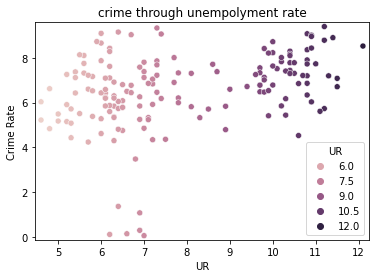

-0.012062646205543221


In [61]:

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

UR=df.UR
cr=df.crime_rate
_ = sns.scatterplot(x='UR',y='crime_rate',hue='UR',data=before_covid)

# Set the margins and label axes
plt.margins(0.02)
plt.title('crime through unempolyment rate')
_ = plt.xlabel('UR')
_ = plt.ylabel('Crime Rate')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(df.UR['2006':],df.crime_rate['2006':]))

# treating suspected data 


I'll use the mean of the data set where the conditions has been approximatly close to early 2008 

In [62]:
sexual_missing =int(before_covid.sexual.mean())
sexual_missing

27

In [63]:
before_covid.sexual['2008-01':'2008-05']=sexual_missing

<ipython-input-63-606ece74fd48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid.sexual['2008-01':'2008-05']=sexual_missing
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [144]:
before_covid['2008']

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,
2008-01-01,27.0,80,162,120700,112300,8400,6.9,262,0,0,1.085336
2008-02-01,27.0,1,12,120100,111700,8400,7.0,17,0,0,0.070774
2008-03-01,27.0,6,24,120200,112300,7900,6.6,37,0,1,0.153910
2008-04-01,27.0,2,25,120800,113400,7500,6.2,30,0,0,0.124172
2008-05-01,27.0,10,64,122200,113800,8400,6.9,75,0,0,0.306874
2008-06-01,32.0,429,1092,124100,115600,8600,6.9,1553,0,0,6.257051
2008-07-01,41.0,679,1602,124500,115400,9100,7.3,2322,0,0,9.325301
2008-08-01,49.0,638,1570,124600,115400,9200,7.4,2257,0,0,9.056982
2008-09-01,33.0,548,1360,123500,114500,9000,7.3,1941,0,0,7.858300


In [64]:
df.violent['2008-01':'2008-05']=int(df.violent.mean())

<ipython-input-64-4191d4fac153>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.violent['2008-01':'2008-05']=int(df.violent.mean())


In [65]:
before_covid.violent['2008-01':'2008-05']=int(df.violent.mean())

<ipython-input-65-74bac4c2952e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid.violent['2008-01':'2008-05']=int(df.violent.mean())


In [66]:
before_covid['2008']

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,
2008-01-01,27,787,162,120700,112300,8400,6.9,262,0,0,1.085336
2008-02-01,27,787,12,120100,111700,8400,7.0,17,0,0,0.070774
2008-03-01,27,787,24,120200,112300,7900,6.6,37,0,1,0.153910
2008-04-01,27,787,25,120800,113400,7500,6.2,30,0,0,0.124172
2008-05-01,27,787,64,122200,113800,8400,6.9,75,0,0,0.306874
2008-06-01,32,429,1092,124100,115600,8600,6.9,1553,0,0,6.257051
2008-07-01,41,679,1602,124500,115400,9100,7.3,2322,0,0,9.325301
2008-08-01,49,638,1570,124600,115400,9200,7.4,2257,0,0,9.056982
2008-09-01,33,548,1360,123500,114500,9000,7.3,1941,0,0,7.858300


In [67]:
before_covid.property['2008-01':'2008-05']=int(df.property.mean())
df.property['2008-01':'2008-05']=int(df.property.mean())

<ipython-input-67-7f30607abd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid.property['2008-01':'2008-05']=int(df.property.mean())
C:\Users\Mamer Jammer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-67-7f30607abd4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.property['2008-01':'2008-05']=int(df.pr

In [68]:
before_covid['2008']

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,
2008-01-01,27,787,2592,120700,112300,8400,6.9,262,0,0,1.085336
2008-02-01,27,787,2592,120100,111700,8400,7.0,17,0,0,0.070774
2008-03-01,27,787,2592,120200,112300,7900,6.6,37,0,1,0.153910
2008-04-01,27,787,2592,120800,113400,7500,6.2,30,0,0,0.124172
2008-05-01,27,787,2592,122200,113800,8400,6.9,75,0,0,0.306874
2008-06-01,32,429,1092,124100,115600,8600,6.9,1553,0,0,6.257051
2008-07-01,41,679,1602,124500,115400,9100,7.3,2322,0,0,9.325301
2008-08-01,49,638,1570,124600,115400,9200,7.4,2257,0,0,9.056982
2008-09-01,33,548,1360,123500,114500,9000,7.3,1941,0,0,7.858300


In [69]:
df['ctotal']=df['sexual']+df['property']+df['violent']

In [70]:
df['crime_rate']=(df['ctotal']/df['Labor Force']*100000)/100/2
df.head()

,sexual,violent,property,Labor Force,Employed,Unemployed,UR,ctotal,lockdown,e_stimulus,crime_rate
date,,,,,,,,,,,
2006-01-01,45,466,972,121900,113900,8000,6.5,1483,0,0,6.082855
2006-02-01,18,301,532,122100,113800,8300,6.8,851,0,0,3.484848
2006-03-01,6,114,215,121900,114100,7800,6.4,335,0,0,1.374077
2006-04-01,18,347,688,122300,114600,7700,6.3,1053,0,0,4.304988
2006-05-01,43,712,1315,122900,115200,7600,6.2,2070,0,0,8.421481


# first Ex , unemployment rate affecting crime rate within a month 

In [179]:
_=df['UR']
_=_.reset_index()
_.head()

,date,UR
0,2006-01-01,6.5
1,2006-02-01,6.8
2,2006-03-01,6.4
3,2006-04-01,6.3
4,2006-05-01,6.2


In [180]:
_['month']=_['date'].dt.month-2
_['year']=_['date'].dt.year
_['day']=_['date'].dt.day

In [181]:
_.head()

,date,UR,month,year,day
0,2006-01-01,6.5,-1,2006,1
1,2006-02-01,6.8,0,2006,1
2,2006-03-01,6.4,1,2006,1
3,2006-04-01,6.3,2,2006,1
4,2006-05-01,6.2,3,2006,1


In [182]:
_=_.drop([0,1])

In [183]:
date_one_month=_[['year','month','day']]
date_one_month=pd.to_datetime(date_one_month,yearfirst=True,errors='coerce',format='%d-%m-%Y')
date_one_month

2     2006-01-01
3     2006-02-01
4     2006-03-01
5     2006-04-01
6     2006-05-01
         ...    
192   1994-10-01
193   1993-10-01
194   1992-10-01
195   1991-10-01
196   1990-10-01
Length: 195, dtype: datetime64[ns]

In [184]:
_=_.drop(['date','month','year','day'],axis=1)

In [185]:
_['date']=date_one_month

In [186]:
_=_.rename(columns={'UR':'UR-2'})

In [187]:
_=_.set_index('date')

In [188]:
_.head()

,UR-2
date,
2006-01-01,6.4
2006-02-01,6.3
2006-03-01,6.2
2006-04-01,6.2
2006-05-01,6.7


In [189]:
df_ex=pd.merge(df,_,on='date',how='left')

In [154]:
df_ex=pd.merge(df,_,on='date',how='left')

In [165]:
df_ex=df_ex.rename(columns={'UR-1':'UR-2'})

In [191]:
df_ex.columns

Index(['sexual', 'violent', 'property', 'Labor Force', 'Employed',
       'Unemployed', 'UR', 'ctotal', 'lockdown', 'e_stimulus', 'crime_rate',
       'UR-2'],
      dtype='object')

<ipython-input-192-a548d4f4efda>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


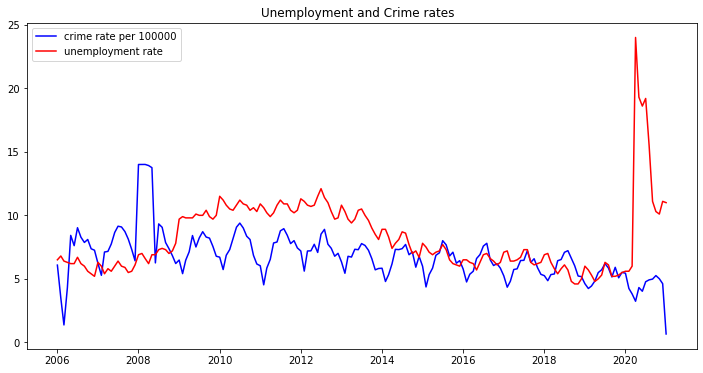

In [192]:
cra=df_ex.crime_rate['2006':'2021']
ura=df_ex.UR['2006':'2021']

fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax22=fig.add_subplot(111)

ax1.plot(cra,color='blue',label='crime rate per 100000')
ax1.set_title('Unemployment and Crime rates  ')
ax22.plot(ura,color='red',label='unemployment rate ')
plt.legend()

<ipython-input-194-c86cbcd2b1e2>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax22=fig.add_subplot(111)


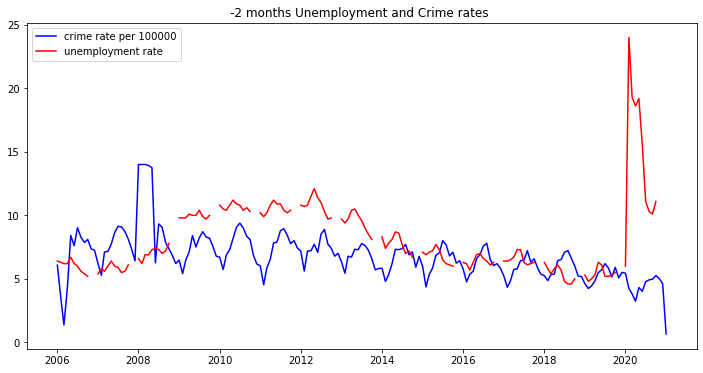

In [194]:
cra=df_ex.crime_rate['2006':'2021']
ura=df_ex['UR-2']['2006':'2021']

fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax22=fig.add_subplot(111)

ax1.plot(cra,color='blue',label='crime rate per 100000')
ax1.set_title('-2 months Unemployment and Crime rates ')
ax22.plot(ura,color='red',label='unemployment rate ')
plt.legend()